In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D  
from imblearn.over_sampling import ADASYN



In [93]:

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [94]:


X_train = pd.read_csv('X_train_self.csv')

X_test = pd.read_csv('X_test_self.csv')

y_train = pd.read_csv('y_train_self.csv')

y_test = pd.read_csv('y_test_self.csv')


In [95]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (52560, 527)
Shape of y_train: (52560, 2)


In [96]:
y_train = y_train['target']
y_test = y_test['target']

In [97]:
X_train["state"].values.reshape(-1,1)

array([['wyoming'],
       ['wyoming'],
       ['wyoming'],
       ...,
       ['new mexico'],
       ['new mexico'],
       ['new mexico']], dtype=object)

In [98]:

encoder = OneHotEncoder()

encoder.fit(X_train['state'].values.reshape(-1, 1))

X_train_encoded = encoder.transform(X_train['state'].values.reshape(-1, 1))
X_test_encoded = encoder.transform(X_test['state'].values.reshape(-1, 1))

X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

print(encoder.categories_[0])

['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'louisiana' 'maine'
 'maryland' 'massachusetts' 'michigan' 'minnesota' 'mississippi'
 'missouri' 'nebraska' 'nevada' 'new hampshire' 'new jersey' 'new mexico'
 'new york' 'north carolina' 'north dakota' 'ohio' 'oklahoma' 'oregon'
 'pennsylvania' 'rhode island' 'south carolina' 'tennessee' 'texas' 'utah'
 'vermont' 'virginia' 'washington' 'west virginia' 'wisconsin' 'wyoming']


In [99]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.categories_[0])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.categories_[0])

In [100]:
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)
X_train.drop('state', axis=1, inplace=True)
X_test.drop('state', axis=1, inplace=True)

In [101]:
X_train

,Unnamed: 0,flu,swine,stomach,symptoms,virus,bug,strep,season,influenza,...,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1090,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52556,1091,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52557,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52558,1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [103]:
concatenated_df = pd.concat([X_train, X_test])

missing_values = concatenated_df.isna().sum()

for column_name, num_missing in missing_values.items():
    if num_missing > 0:
        print(f"Column '{column_name}' has {num_missing} missing values.")
    else :
        print("-")

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [104]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [105]:
X_train

,Unnamed: 0,flu,swine,stomach,symptoms,virus,bug,strep,season,influenza,...,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1090,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52556,1091,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52557,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52558,1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

In [107]:
X.iloc[1000, : ]

y_train

0        0
1        0
2        0
3        0
4        0
        ..
52555    1
52556    1
52557    1
52558    1
52559    1
Name: target, Length: 52560, dtype: int64

In [108]:

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)



In [109]:
X_train = X_res
y_train = y_res

In [110]:
y_train.value_counts()

target
0    49655
1    49573
Name: count, dtype: int64

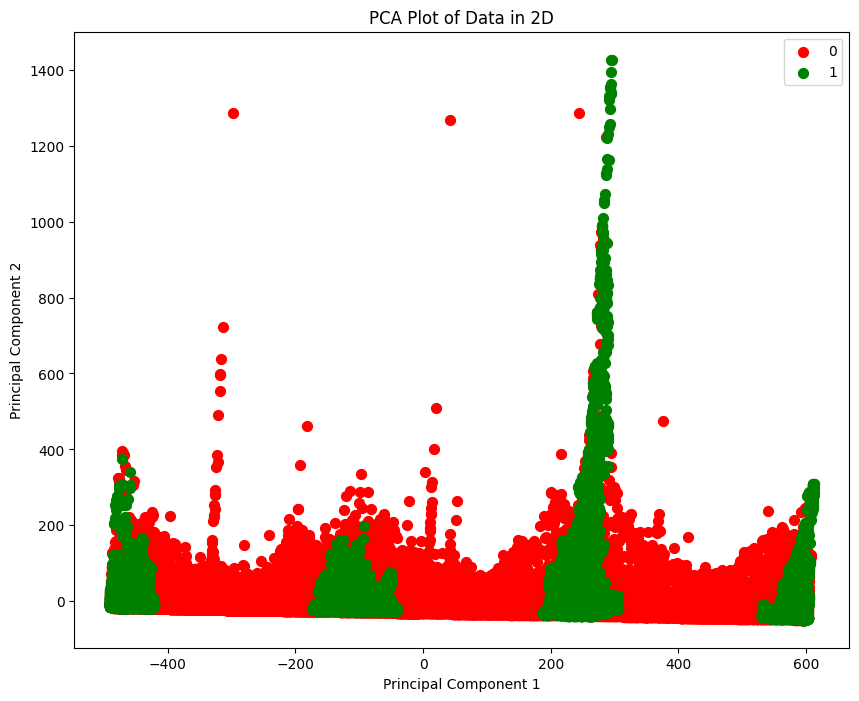

In [111]:


X = pd.concat([X_train, X_test], axis=0)

y = pd.concat([y_train, y_test], axis=0)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y.values

plt.figure(figsize=(10, 8))
targets = df_pca['Target'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'gray'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'], df_pca.loc[indices_to_keep, 'PC2'], c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Data in 2D')
plt.legend()
plt.show()


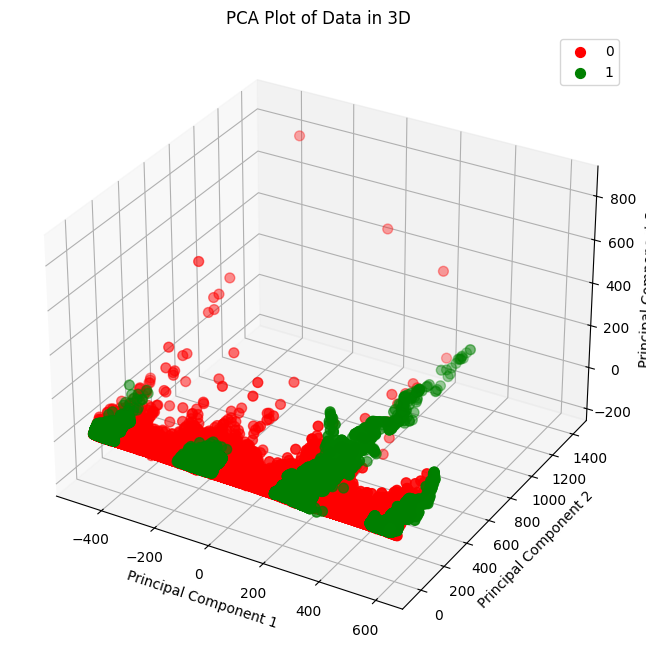

In [112]:


X = pd.concat([X_train, X_test], axis=0)

y = pd.concat([y_train, y_test], axis=0)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Target'] = y.values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = df_pca['Target'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'gray'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    ax.scatter(df_pca.loc[indices_to_keep, 'PC1'], 
               df_pca.loc[indices_to_keep, 'PC2'], 
               df_pca.loc[indices_to_keep, 'PC3'], 
               c=color, 
               s=50, 
               label=target)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Plot of Data in 3D')
ax.legend()
plt.show()


<h1> Random Forest Classifier  </h1>

In [113]:


rf = RandomForestClassifier()

rf.fit(X_train, y_train)

train_predictions_rf = rf.predict(X_train)
test_predictions_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 1.0
Test Accuracy: 0.901159793814433
Confusion Matrix:
 [[20948    50]
 [ 2251    31]]
Precision: 0.8519725580933154
Recall: 0.901159793814433
F1 Score: 0.8575888900161178
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     20998
           1       0.38      0.01      0.03      2282

    accuracy                           0.90     23280
   macro avg       0.64      0.51      0.49     23280
weighted avg       0.85      0.90      0.86     23280



<h1>Naive Baise</h1>

In [114]:
nb = GaussianNB()

nb.fit(X_train, y_train)

train_predictions_nb = nb.predict(X_train)
test_predictions_nb = nb.predict(X_test)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.609968960374088
Test Accuracy: 0.8631872852233677
Confusion Matrix:
 [[19303  1695]
 [ 1490   792]]
Precision: 0.8685578387464596
Recall: 0.8631872852233677
F1 Score: 0.8657922395722166
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     20998
           1       0.32      0.35      0.33      2282

    accuracy                           0.86     23280
   macro avg       0.62      0.63      0.63     23280
weighted avg       0.87      0.86      0.87     23280



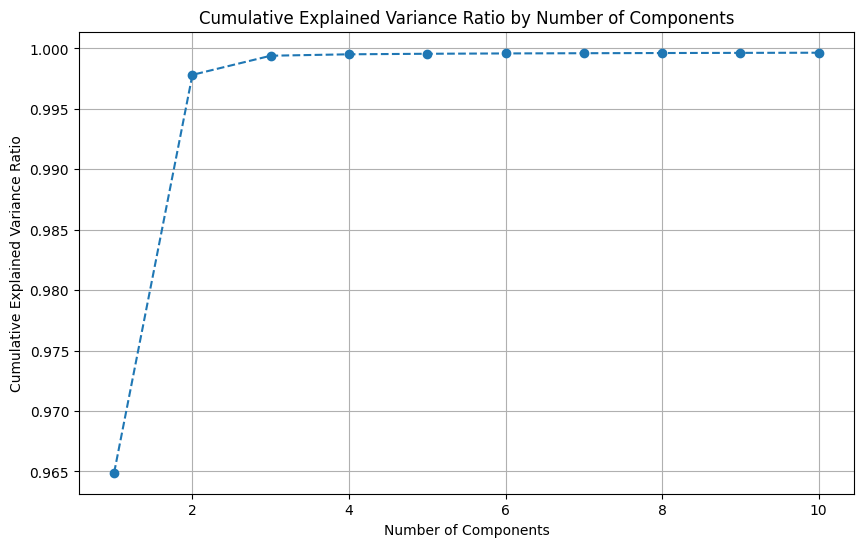

In [115]:


pca = PCA(n_components=10)

pca.fit(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


<h1>PCA (n_components = 3)</h1> 

In [116]:

pca = PCA(n_components=3)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


<h2>RF </h2>

In [117]:

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9999899221993792
Test Accuracy: 0.8341494845360825
Confusion Matrix:
 [[19059  1939]
 [ 1922   360]]
Precision: 0.8346984819274779
Recall: 0.8341494845360825
F1 Score: 0.8344236367440833
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     20998
           1       0.16      0.16      0.16      2282

    accuracy                           0.83     23280
   macro avg       0.53      0.53      0.53     23280
weighted avg       0.83      0.83      0.83     23280



<h1> Gaussian NB </h1>

In [118]:
nb = GaussianNB()

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.5756842826621518
Test Accuracy: 0.8694158075601375
Confusion Matrix:
 [[19918  1080]
 [ 1960   322]]
Precision: 0.8436833529921659
Recall: 0.8694158075601375
F1 Score: 0.8551595075273042
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     20998
           1       0.23      0.14      0.17      2282

    accuracy                           0.87     23280
   macro avg       0.57      0.54      0.55     23280
weighted avg       0.84      0.87      0.86     23280



<h1>PCA (n_components = 2)</h1> 

In [119]:

pca = PCA(n_components=2)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [120]:
X_test_pca


array([[-549.48081643,  -17.9196909 ],
       [-548.52438256,  -19.48323894],
       [-547.52474651,  -19.51015375],
       ...,
       [ -67.69948473,  -32.42926154],
       [ -66.69984868,  -32.45617634],
       [ -65.70021262,  -32.48309115]])

<h2>RF</h2>

In [121]:

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9996371991776515
Test Accuracy: 0.8177405498281787
Confusion Matrix:
 [[18514  2484]
 [ 1759   523]]
Precision: 0.8407644959297498
Recall: 0.8177405498281787
F1 Score: 0.8286314758212726
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     20998
           1       0.17      0.23      0.20      2282

    accuracy                           0.82     23280
   macro avg       0.54      0.56      0.55     23280
weighted avg       0.84      0.82      0.83     23280



<h2>G nb</h2>

In [122]:
nb = GaussianNB()

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.5625730640545007
Test Accuracy: 0.8756443298969072
Confusion Matrix:
 [[20089   909]
 [ 1986   296]]
Precision: 0.84490769266246
Recall: 0.8756443298969072
F1 Score: 0.857994689893366
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     20998
           1       0.25      0.13      0.17      2282

    accuracy                           0.88     23280
   macro avg       0.58      0.54      0.55     23280
weighted avg       0.84      0.88      0.86     23280



<h1>PCA (n_components = 1)</h1> 

In [123]:

pca = PCA(n_components=1)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


<h2>RF<h2>

In [124]:

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9978937396702544
Test Accuracy: 0.8100945017182131
Confusion Matrix:
 [[18275  2723]
 [ 1698   584]]
Precision: 0.8426052354802112
Recall: 0.8100945017182131
F1 Score: 0.825132952994793
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     20998
           1       0.18      0.26      0.21      2282

    accuracy                           0.81     23280
   macro avg       0.55      0.56      0.55     23280
weighted avg       0.84      0.81      0.83     23280



<h2>G nb<h2>

In [125]:
nb = GaussianNB()

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.554742612972145
Test Accuracy: 0.5683419243986254
Confusion Matrix:
 [[12748  8250]
 [ 1799   483]]
Precision: 0.7958517453531677
Recall: 0.5683419243986253
F1 Score: 0.655573043598579
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72     20998
           1       0.06      0.21      0.09      2282

    accuracy                           0.57     23280
   macro avg       0.47      0.41      0.40     23280
weighted avg       0.80      0.57      0.66     23280



<nb>
<h1 style="color:green">  

 Artifical neural networks 
 
 
 
 
 </h1>

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
0,-1.576942,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,7.437182
1,-1.574069,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,7.437182
2,-1.571196,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,7.437182
3,-1.568322,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,7.437182
4,-1.565449,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,7.437182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99223,1.560830,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,-0.140071
99224,1.566577,-0.431306,-0.347208,-0.385188,-0.403001,-0.418096,-0.424706,-0.435341,-0.444957,-0.450924,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,-0.140071
99225,1.560830,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,-0.140071
99226,1.560830,-0.431306,-0.519842,-0.525473,-0.522871,-0.526244,-0.523055,-0.528317,-0.533510,-0.535567,...,-0.164381,-0.17095,-0.191654,-0.173213,-0.130686,-0.172882,-0.116418,-0.147477,-0.111512,-0.140071


In [128]:
best_params = {'batch_size': 10, 'epochs': 5, "layer1": 10, "layer2": 10}
best_accuracy  = 0
epochs = [5,10,15]
batch_size = [10,20,30,40]
layers1 = [10,20,30,40]
layers2 = [10,20,30,40]

for epoch in epochs:
    for batch in batch_size:
        for layer1 in layers1:
            for layer2 in layers2:  
                model = Sequential()
                model.add(Dense(layer1, input_dim=X_train_pca.shape[1], activation='relu'))
                model.add(Dense(layer2, activation='relu'))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=epoch, batch_size=batch, verbose=1)
                test_accuracy = model.evaluate(X_test_pca, y_test)[1]
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = {'batch_size': batch, 'epochs': epoch, "layer1": layer1,"layer2"  : layer2}
                    print("Best Parameters:", best_params)
                    print("Test Accuracy:", test_accuracy)
                print("Test Accuracy:", test_accuracy)

In [129]:
best_params = {'batch_size': 10, 'epochs': 5, "layer1": 10, "layer2": 10}
print("Best Parameters:", best_params)
best_accuracy


Best Parameters: {'batch_size': 10, 'epochs': 5, 'layer1': 10, 'layer2': 10}


0

<h1>  Without PCA </h1>

In [130]:
models_params_results = [ {"report" : [], "params" : {"layer1" : 16,"layer2" : 16,"batch_size" : 32 } }]

In [131]:
best_params = {'batch_size': 35, 'epochs': 10, "layer1": 16, "layer2": 16}
model = Sequential()
model.add(Dense(best_params['layer1'], input_dim=X_res.shape[1], activation='relu'))
model.add(Dense(best_params['layer2'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_res, y_res, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)



/home/benk/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 2s 480us/step - accuracy: 0.7251 - loss: 1.0054
Epoch 2/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.8862 - loss: 0.2852
Epoch 3/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.9090 - loss: 0.2321
Epoch 4/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.9190 - loss: 0.2098
Epoch 5/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.9255 - loss: 0.1931
Epoch 6/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.9322 - loss: 0.1792
Epoch 7/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9356 - loss: 0.1710
Epoch 8/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.9355 - loss: 0.1719
Epoch 9/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.9401 - loss: 0.1619
Epoch 10/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.9418 - loss: 0.1579


In [132]:
predicted = model.predict(X_test) >= 0.5

rep = classification_report(y_test, predicted)

print(rep)

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     20998
           1       0.29      0.37      0.33      2282

    accuracy                           0.85     23280
   macro avg       0.61      0.64      0.62     23280
weighted avg       0.87      0.85      0.86     23280



In [133]:
X_temp = X_train
y_temp = y_train

In [134]:
best_params = {'batch_size': 50, 'epochs': 50, "layer1": 16, "layer2": 16}
model = Sequential()
model.add(Dense(best_params['layer1'], input_dim=X_temp.shape[1], activation='relu'))
model.add(Dense(best_params['layer2'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_temp, y_temp, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

/home/benk/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 2s 497us/step - accuracy: 0.8049 - loss: 0.4115
Epoch 2/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9459 - loss: 0.1529
Epoch 3/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9670 - loss: 0.0964
Epoch 4/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.9758 - loss: 0.0706
Epoch 5/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9783 - loss: 0.0617
Epoch 6/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.9823 - loss: 0.0507
Epoch 7/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.9847 - loss: 0.0441
Epoch 8/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9854 - loss: 0.0420
Epoch 9/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.9866 - loss: 0.0389
Epoch 10/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9873 - loss: 0.0346
Epoch 11/50
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9882 - loss: 0.0329
Epoch 12

In [135]:
predicted = model.predict(X_test) >= 0.5 
rep = classification_report(y_test, predicted)

print(rep)

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     20998
           1       0.38      0.19      0.26      2282

    accuracy                           0.89     23280
   macro avg       0.65      0.58      0.60     23280
weighted avg       0.86      0.89      0.87     23280



<h1>  WITH OverSampling </h1>

In [136]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [137]:
predicted = model.predict(X_test) > 0.5

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


In [138]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     20998
           1       0.38      0.19      0.26      2282

    accuracy                           0.89     23280
   macro avg       0.65      0.58      0.60     23280
weighted avg       0.86      0.89      0.87     23280



<h1>  Trying oversampling </h1>

In [139]:
from imblearn import over_sampling
import keras
#merge X_train_pca and y_train
X_train_pca_df = pd.DataFrame(X_train_pca)
y_train_df = pd.DataFrame(y_train)


In [140]:
oversampler = over_sampling.RandomOverSampler(sampling_strategy="minority")

In [141]:
X_over, y_over = oversampler.fit_resample(X_train_pca_df, y_train_df)

In [142]:
print(y_train.value_counts())
y_over.value_counts()

target
0    49655
1    49573
Name: count, dtype: int64


target
0         49655
1         49655
Name: count, dtype: int64

In [143]:
best_params = {'batch_size': 10, 'epochs': 10, "layer1": 30, "layer2": 30}
model = Sequential()
model.add(Dense(best_params['layer1'], input_dim=X_train_pca.shape[1], activation='relu'))
model.add(Dense(best_params['layer2'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_over, y_over, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/10


/home/benk/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 423us/step - accuracy: 0.5789 - loss: 0.8376
Epoch 2/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 416us/step - accuracy: 0.6739 - loss: 0.5986
Epoch 3/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 398us/step - accuracy: 0.7384 - loss: 0.5014
Epoch 4/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 392us/step - accuracy: 0.8279 - loss: 0.3963
Epoch 5/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 393us/step - accuracy: 0.8417 - loss: 0.3688
Epoch 6/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 392us/step - accuracy: 0.8447 - loss: 0.3595
Epoch 7/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 395us/step - accuracy: 0.8492 - loss: 0.3558
Epoch 8/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 393us/step - accuracy: 0.8569 - loss: 0.3465
Epoch 9/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 394us/step - accuracy: 0.8568 - loss: 0.3459
Epoch 10/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 396us/step - accuracy: 0.8568 - loss: 0.3455


In [144]:
predicted = model.predict(X_test_pca) > 0.5
print(classification_report(predicted, y_test))

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
              precision    recall  f1-score   support

       False       0.69      0.90      0.78     16171
        True       0.27      0.09      0.13      7109

    accuracy                           0.65     23280
   macro avg       0.48      0.49      0.46     23280
weighted avg       0.56      0.65      0.58     23280



In [145]:
y_train.value_counts()

target
0    49655
1    49573
Name: count, dtype: int64

<h1 style="color:green">  Decision Tree Classifier </h1>

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=46,splitter="best")
dt.fit(X_over, y_over)

test_predicted = dt.predict(X_over)



In [147]:
y_test.value_counts()

target
0    20998
1     2282
Name: count, dtype: int64

In [148]:
print(classification_report(test_predicted, y_over))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     42976
           1       0.95      0.84      0.89     56334

    accuracy                           0.88     99310
   macro avg       0.88      0.89      0.88     99310
weighted avg       0.89      0.88      0.89     99310



<h1> 


K Nearest Neighbour




 </h1>

In [149]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  


In [150]:
# Train the Model
knn_classifier.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [151]:
y_pred = knn_classifier.predict(X_test_pca)


In [152]:
y_pred = np.array(y_pred)

In [153]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
23275    0
23276    0
23277    0
23278    0
23279    0
Name: target, Length: 23280, dtype: int64

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7950171821305841


In [156]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print("classification report:", classification_report)

classification report:               precision    recall  f1-score   support

           0       0.92      0.85      0.88     20998
           1       0.17      0.29      0.22      2282

    accuracy                           0.80     23280
   macro avg       0.55      0.57      0.55     23280
weighted avg       0.84      0.80      0.82     23280



In [157]:

# Train the Model
knn_classifier = KNeighborsClassifier(5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [158]:
y_pred = knn_classifier.predict(X_test)

In [159]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("classification report:", report)

classification report:               precision    recall  f1-score   support

           0       0.91      0.92      0.92     20998
           1       0.23      0.21      0.22      2282

    accuracy                           0.85     23280
   macro avg       0.57      0.57      0.57     23280
weighted avg       0.85      0.85      0.85     23280



In [160]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)


In [161]:
# Train the Model
knn_classifier.fit(X_res, y_res)

KNeighborsClassifier()

In [162]:
y_pred = knn_classifier.predict(X_test)
y_pred 

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     20998
           1       0.23      0.21      0.22      2282

    accuracy                           0.85     23280
   macro avg       0.57      0.57      0.57     23280
weighted avg       0.85      0.85      0.85     23280



In [164]:
y_test_reshaped = np.hstack((np.arange(len(y_test)).reshape(-1,1), np.zeros((len(y_test), 1))))
y_test_reshaped

array([[0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00],
       [2.0000e+00, 0.0000e+00],
       ...,
       [2.3277e+04, 0.0000e+00],
       [2.3278e+04, 0.0000e+00],
       [2.3279e+04, 0.0000e+00]])

In [165]:
y_test_reshaped.shape

(23280, 2)

In [166]:
y_true = y_test
y_true.shape

(23280,)

In [167]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
y_train_reshaped = np.hstack((np.arange(len(y_train)).reshape(-1,1), np.zeros((len(y_train), 1))))
y_train_reshaped

array([[0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00],
       [2.0000e+00, 0.0000e+00],
       ...,
       [9.9225e+04, 0.0000e+00],
       [9.9226e+04, 0.0000e+00],
       [9.9227e+04, 0.0000e+00]])

In [169]:
# Initialize the SVM Classifier
svm_classifier = SVC()

In [170]:
y_train_target = y_train

In [171]:
# Train the Model
#svm_classifier.fit(X_train_pca, y_train_target)

In [172]:
# Instantiate the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_pca, y_train_target)

SVC()

In [173]:
# Make Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)
#y_pred_svm = y_pred_svm[: ,1]
y_pred_svm

array([1, 1, 1, ..., 0, 0, 0])

In [174]:
y_test_target = y_test
y_test_target

0        0
1        0
2        0
3        0
4        0
        ..
23275    0
23276    0
23277    0
23278    0
23279    0
Name: target, Length: 23280, dtype: int64

In [175]:
y_test_array = np.array(y_test_target)
y_test_array

array([0, 0, 0, ..., 0, 0, 0])

In [176]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7783505154639175


the svm accuracy for the train


In [177]:
# Make Predictions
y_pred_svm_train = svm_classifier.predict(X_train_pca)
y_pred_svm_train

array([1, 1, 1, ..., 1, 1, 1])

In [178]:
y_train_target = y_train
y_train_target = np.array(y_train_target)
y_train_target

array([0, 0, 0, ..., 1, 1, 1])

In [179]:
# Calculate accuracy
accuracy_svm_train = accuracy_score(y_train_target, y_pred_svm_train) 
print("SVM Accuracy:", accuracy_svm_train)

SVM Accuracy: 0.8408412947958238


In [180]:
# Calculate accuracy
from sklearn.metrics import classification_report
classification_report_svm_train = classification_report(y_train_target, y_pred_svm_train) 
print(classification_report_svm_train)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83     49655
           1       0.81      0.89      0.85     49573

    accuracy                           0.84     99228
   macro avg       0.84      0.84      0.84     99228
weighted avg       0.84      0.84      0.84     99228



In [181]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_pca, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_oversampled))

Class distribution after oversampling: Counter({0: 49655, 1: 49655})


In [182]:
# Instantiate the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_oversampled, y_train_oversampled)

SVC()

In [183]:
# Make Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)
#y_pred_svm = y_pred_svm[: ,1]
y_pred_svm

array([1, 1, 1, ..., 0, 0, 0])

In [184]:
# Calculate accuracy
classification_report_svm_train = classification_report(y_test_target, y_pred_svm) 
print(classification_report_svm_train)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     20998
           1       0.13      0.21      0.16      2282

    accuracy                           0.78     23280
   macro avg       0.52      0.53      0.52     23280
weighted avg       0.83      0.78      0.80     23280



In [185]:
# Train the Model
knn_classifier.fit(X_train_oversampled, y_train_oversampled)


KNeighborsClassifier()

In [186]:
y_pred = knn_classifier.predict(X_test_pca)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [187]:
classification_report = classification_report(y_test2, y_pred)
print(classification_report) 

NameError: name 'y_test2' is not defined